## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head(5)
study_results.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Combine the data into a single dataset

trial_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
trial_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume_mean = trial_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median = trial_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_std = trial_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_sem = trial_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_study_summary = pd.DataFrame({
    "Tumor Volume Mean" : tumor_volume_mean,
    "Tumor Volume Median" : tumor_volume_median,
    "Tumor Volume STD" : tumor_volume_std,
    "Tumor Volume SEM" : tumor_volume_sem})

tumor_study_summary


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatment_count_trim = trial_data[["Mouse ID","Drug Regimen"]]
treatment_count_rename = treatment_count_trim.rename(columns={"Mouse ID":"Treatment Count"})
treatment_count_df = treatment_count_rename.groupby("Drug Regimen").count()

treatment_count_df

,Treatment Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


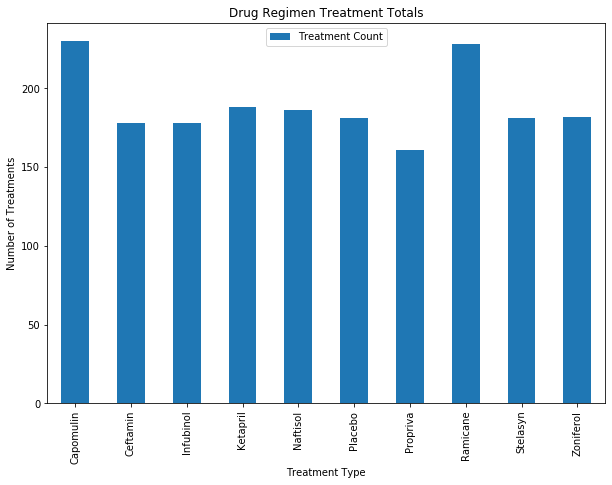

In [5]:
treatment_chart = treatment_count_df.plot(kind="bar", figsize=(10,7))

plt.title("Drug Regimen Treatment Totals")
treatment_chart.set_xlabel("Treatment Type")
treatment_chart.set_ylabel("Number of Treatments")

plt.show()

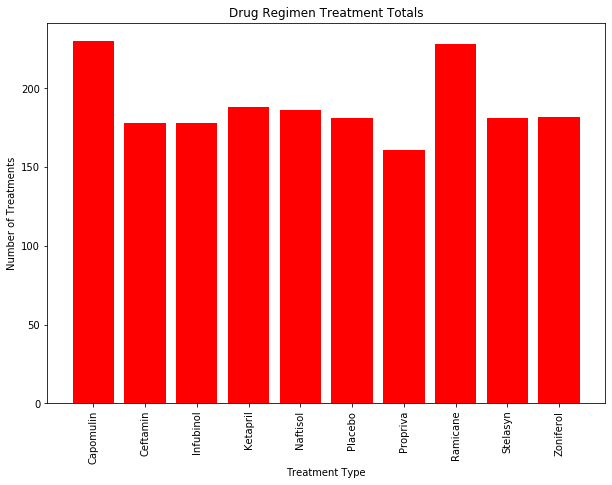

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = x_axis = np.arange(len(treatment_count_df))
tick_locations = [value for value in x_axis]
y_axis = treatment_count_df["Treatment Count"]

plt.figure(figsize=(10,7))
plt.bar(x_axis, y_axis, color='r', align='center')
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],rotation='vertical')

plt.title("Drug Regimen Treatment Totals")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Treatments")

plt.show()

## Pie plots

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count_trim = trial_data[["Mouse ID","Sex"]]
gender_count_index = gender_count_trim.set_index("Sex")
gender_count_rename = gender_count_index.rename(columns={"Mouse ID":"Treatment Count"})
gender_count_df = gender_count_rename.groupby("Sex").count()
gender_list = gender_count_df.keys()

gender_count_df

,Treatment Count
Sex,
Female,935
Male,958


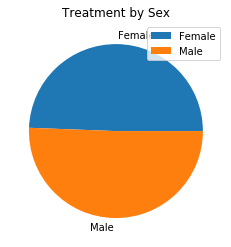

In [8]:
gender_count_chart = gender_count_df.plot(kind="pie", y=gender_list, title=("Treatment by Sex"))
gender_count_chart.set_ylabel("")

plt.show()


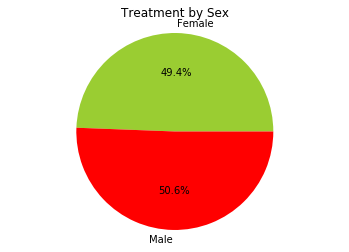

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = list(gender_count_df.index.values)
count = gender_count_df['Treatment Count']
colors = ['yellowgreen','red']

plt.title("Treatment by Sex")
plt.pie(count, labels=sex, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [10]:
group_by_mouse_max = trial_data.groupby("Mouse ID").max()
group_by_mouse_max_index = group_by_mouse_max.reset_index()
mouse_max = group_by_mouse_max_index[["Mouse ID", "Timepoint"]]


merge_df = pd.merge(mouse_max, trial_data, on =["Mouse ID", "Timepoint"], how="left")

top_performers = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin") | 
                                      (merge_df["Drug Regimen"] == "Ramicane") |
                                      (merge_df["Drug Regimen"] == "Infubinol") |
                                      (merge_df["Drug Regimen"] == "Ceftamin")]

top_performers.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
11,a577,30,Infubinol,Female,6,25,57.031862,2
12,a644,45,Ramicane,Female,7,17,32.978522,1
13,a685,45,Infubinol,Male,8,30,66.083066,3
19,b128,45,Capomulin,Female,9,22,38.982878,2


In [11]:
tumor_size = top_performers["Tumor Volume (mm3)"]

quartiles = round(tumor_size.quantile([.25,.5,.75]))
lowerq = round(quartiles[0.25])
upperq = round(quartiles[0.75])
iqr = round(upperq-lowerq)

print(f"The lower quartile of Tumor Size (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Size (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Size (mm3) is: {iqr}")
print(f"The the median of Tumor Size (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Size (mm3) is: 37.0
The upper quartile of Tumor Size (mm3) is: 60.0
The interquartile range of Tumor Size (mm3) is: 23.0
The the median of Tumor Size (mm3) is: 45.0 
Values below 2.5 could be outliers.
Values above 94.5 could be outliers.


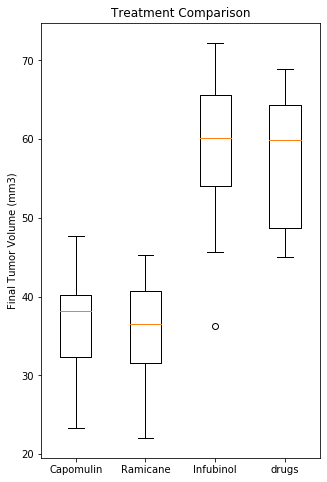

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize=(5,8))

capomulin = top_performers.loc[top_performers["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = top_performers.loc[top_performers["Drug Regimen"] == "Ramicane"] ["Tumor Volume (mm3)"]
infubinol = top_performers.loc[top_performers["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = top_performers.loc[top_performers["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

labels = ["Capomulin", "Ramicane", "Infubinol", "drugs"]

plt.boxplot([capomulin,ramicane,infubinol,ceftamin], labels=labels)

plt.title("Treatment Comparison")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and scatter plots

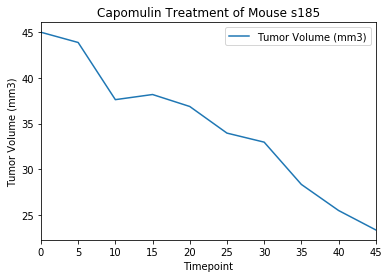

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_columns = trial_data[["Mouse ID", "Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]
capomulin_only = line_plot_columns.loc[(line_plot_columns["Drug Regimen"]=="Capomulin") &
                                      (line_plot_columns["Mouse ID"]=="s185")]

line_graph_columns = capomulin_only[["Timepoint", "Tumor Volume (mm3)"]]
line_graph_index = line_graph_columns.set_index("Timepoint")


line_plot_graph = line_graph_index.plot.line(title="Capomulin Treatment of Mouse s185")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

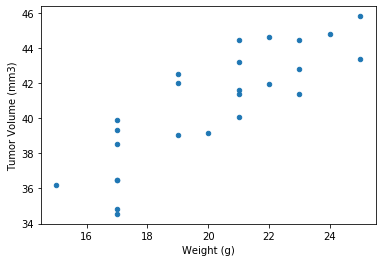

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_plot_columns = trial_data[["Mouse ID","Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_reg_only = scatter_plot_columns.loc[line_plot_columns["Drug Regimen"]=="Capomulin",:]

scatter_plot_avg = capomulin_reg_only.groupby(['Mouse ID']).mean()
scatter_plot_avg.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)')

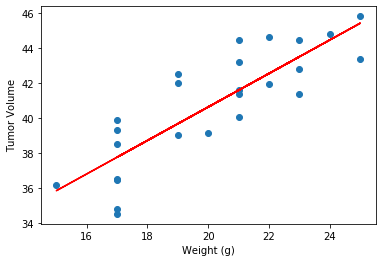

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = scatter_plot_avg["Weight (g)"]
y_values = scatter_plot_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.show()

In [17]:
corr_matrix_df = scatter_plot_avg[["Weight (g)","Tumor Volume (mm3)"]]
corr_matrix_df.columns = corr_matrix_df.columns.str.replace("[_]", " ")
corr_matrix_df.corr(method='pearson')

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000
